# Examples

Some examples of how to use the anomaly agent.

<a target="_blank" href="https://colab.research.google.com/github/andrewm4894/anomaly-agent/blob/main/notebooks/examples.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [1]:
import os
import pandas as pd
from anomaly_agent.utils import make_df, make_anomaly_config
from anomaly_agent.plot import plot_df_matplotlib as plot_df
from anomaly_agent.agent import AnomalyAgent

pd.set_option('display.max_colwidth', None)

# set openai api key if not in environment
# os.environ['OPENAI_API_KEY'] = "<your-openai-api-key>"

In [2]:
# get and anomaly config to generate some dummy data
anomaly_cfg = make_anomaly_config()
print(anomaly_cfg)

# generate some dummy data
df = make_df(100, 3, anomaly_config=anomaly_cfg)
df.head()


{'enabled': True, 'fraction': 0.05, 'methods': ['spike', 'drop', 'shift', 'noise'], 'spike_factor': 10, 'shift_value': 3, 'noise_std': 0.2}


,timestamp,var1,var2,var3
0,2020-01-01,0.447012,0.345706,0.115320
1,2020-01-02,0.166829,0.017249,0.404394
2,2020-01-03,0.226234,0.786596,0.976088
3,2020-01-04,0.735495,0.192818,0.310216
4,2020-01-05,0.236350,0.749001,0.572613


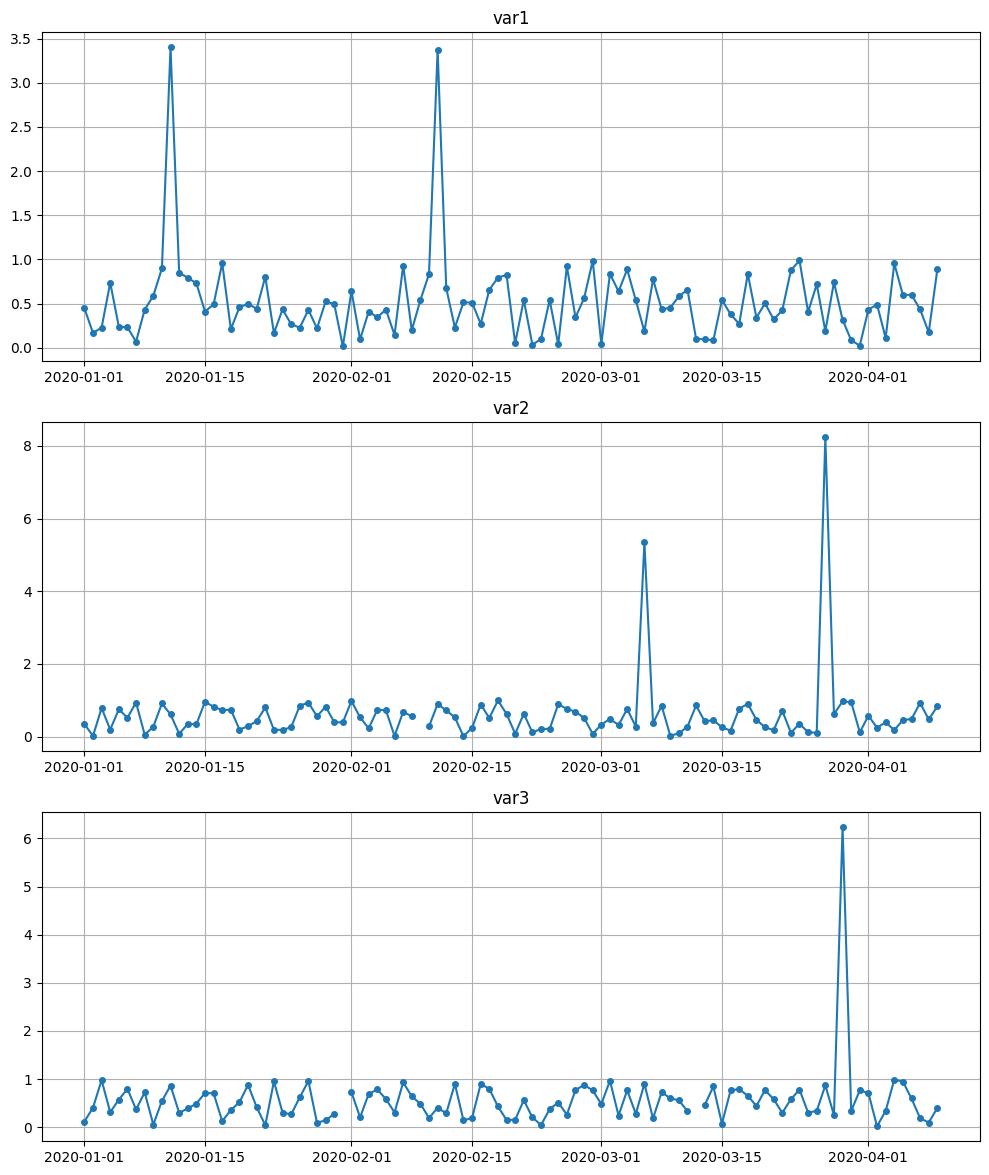

In [3]:
# plot the data
plot_df(df)

In [4]:
# create anomaly agent
anomaly_agent = AnomalyAgent()

# detect anomalies
anomalies = anomaly_agent.detect_anomalies(df)

# detect anomalies without verification
anomalies_no_verify = anomaly_agent.detect_anomalies(df, verify=False)

# print anomalies
print(anomalies)


{'var1': AnomalyList(anomalies=[Anomaly(timestamp='2020-01-11', variable_value=3.402686, anomaly_description='Significantly higher value than the surrounding data, indicating a potential spike or error.'), Anomaly(timestamp='2020-02-11', variable_value=3.373612, anomaly_description='Significantly higher value than the surrounding data, indicating a potential spike or error.')]), 'var2': AnomalyList(anomalies=[Anomaly(timestamp='2020-02-09', variable_value=0.0, anomaly_description='Missing value (NaN) detected.'), Anomaly(timestamp='2020-03-06', variable_value=5.349642, anomaly_description='Significantly high outlier detected.'), Anomaly(timestamp='2020-03-27', variable_value=8.238786, anomaly_description='Extreme outlier detected.')]), 'var3': AnomalyList(anomalies=[Anomaly(timestamp='2020-01-30', variable_value=0.0, anomaly_description='Missing data (NaN) detected.'), Anomaly(timestamp='2020-03-11', variable_value=0.0, anomaly_description='Missing data (NaN) detected.'), Anomaly(times

In [5]:
# get anomalies in long format
df_anomalies_long = anomaly_agent.get_anomalies_df(anomalies)
df_anomalies_long.head()

,timestamp,variable_name,value,anomaly_description
0,2020-01-11,var1,3.402686,"Significantly higher value than the surrounding data, indicating a potential spike or error."
1,2020-02-11,var1,3.373612,"Significantly higher value than the surrounding data, indicating a potential spike or error."
2,2020-02-09,var2,0.000000,Missing value (NaN) detected.
3,2020-03-06,var2,5.349642,Significantly high outlier detected.
4,2020-03-27,var2,8.238786,Extreme outlier detected.


In [6]:
# get anomalies in wide format
df_anomalies_wide = anomaly_agent.get_anomalies_df(anomalies, format="wide")

df_anomalies_wide_no_verify = anomaly_agent.get_anomalies_df(anomalies_no_verify, format="wide")

df_anomalies_wide.head()


,timestamp,var1,var2,var3
0,2020-01-11,3.402686,NaN,NaN
1,2020-02-11,3.373612,NaN,NaN
2,2020-02-09,NaN,0.000000,NaN
3,2020-03-06,NaN,5.349642,NaN
4,2020-03-27,NaN,8.238786,NaN


In [7]:
# merge anomalies with original data
df_final = df.merge(df_anomalies_wide, on="timestamp", how="left", suffixes=("", "_anomaly_flag"))

df_final_no_verify = df.merge(df_anomalies_wide_no_verify, on="timestamp", how="left", suffixes=("", "_anomaly_flag"))

df_final.head()


,timestamp,var1,var2,var3,var1_anomaly_flag,var2_anomaly_flag,var3_anomaly_flag
0,2020-01-01,0.447012,0.345706,0.115320,NaN,NaN,NaN
1,2020-01-02,0.166829,0.017249,0.404394,NaN,NaN,NaN
2,2020-01-03,0.226234,0.786596,0.976088,NaN,NaN,NaN
3,2020-01-04,0.735495,0.192818,0.310216,NaN,NaN,NaN
4,2020-01-05,0.236350,0.749001,0.572613,NaN,NaN,NaN


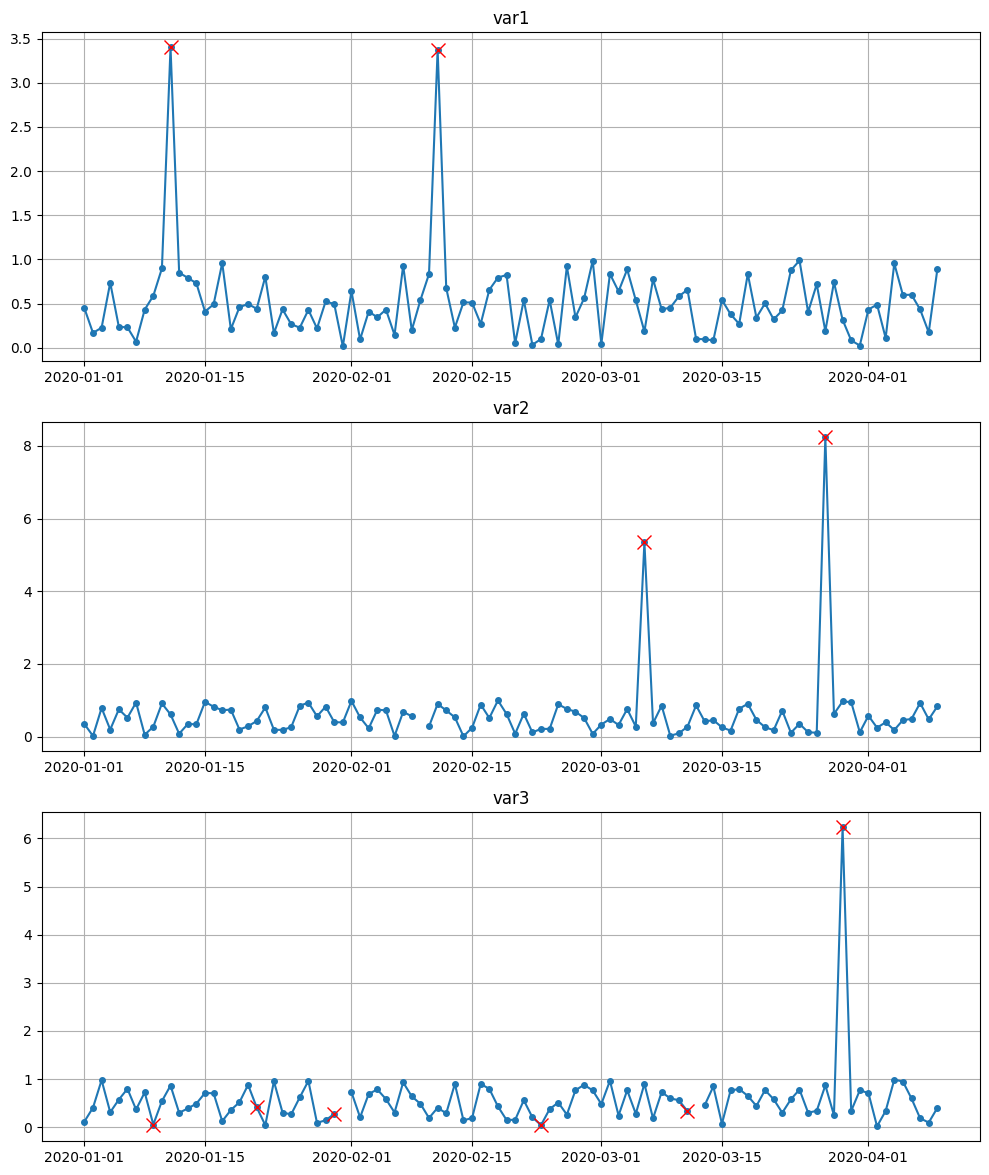

In [10]:
# plot final data with anomalies
plot_df(df_final)

In [9]:
# plot final data no verify
fig = plot_df(df_final_no_verify, return_fig=True)
fig.show()